
# runge_kutta_4_circular_motion_xy
Circular motion in xy coordinate with velocity Runge-Kutta 4 method.

## magnetic force on moving charge

In [1]:
import math

Bx = 0
By = 0
Bz = -1
B = math.sqrt(Bx**2 + By**2 + Bz**2)

q = 1
m = 1

vx = 0
vy = 1
vz = 0
v = math.sqrt(vx**2 + vy**2 + vz**2)

R = (m * v) / (q * B)
x = R
y = 0
z = 0

T = 2 * math.pi * R / v
tbeg = 0
tend = 2 * T
N = 100
dt = (tend - tbeg) / N

tt = []
xx = []
yy = []
zz = []
for i in range(N + 1):
    t = i * dt
    
    ax = q * (vy * Bz - vz * By)
    ay = q * (vz * Bx - vx * Bz)
    az = q * (vx * By - vy * Bx)
    
    x = x + vx * dt + 0.5 * ax * dt**2
    y = y + vy * dt + 0.5 * ay * dt**2
    z = z + vz * dt + 0.5 * az * dt**2
    
    ax_ = q * (vy * Bz - vz * By)
    ay_ = q * (vz * Bx - vx * Bz)
    az_ = q * (vx * By - vy * Bx)
    
    vx = vx + 0.5 * (ax + ax_) * dt
    vy = vy + 0.5 * (ay + ay_) * dt
    vz = vz + 0.5 * (ay + ay_) * dt
    
    tt.append(t)
    xx.append(x)
    yy.append(y)
    zz.append(z)

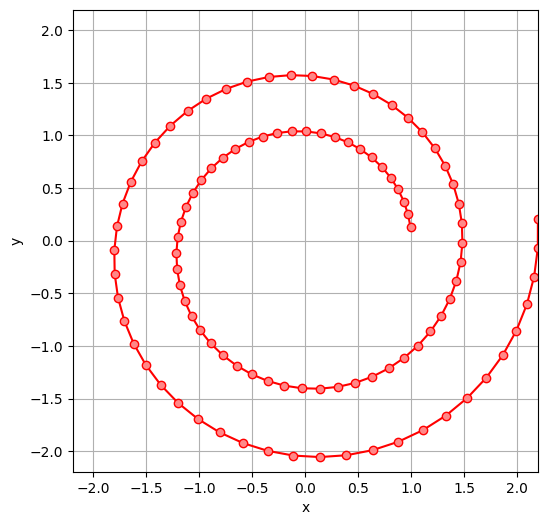

In [2]:
xmax = max(abs(min(xx)), max(xx))
ymax = max(abs(min(yy)), max(yy))
xymax = max(xmax, ymax)

import matplotlib.pyplot as plt
plt.figure(figsize=(6, 6))
plt.xlim([-xymax, xymax])
plt.ylim([-xymax, xymax])
plt.grid()
plt.xlabel('x')
plt.ylabel('y')
plt.plot(xx, yy, 'ro-', mfc='#f88')
plt.show()

It produces relatively similar result compared to [Euler algorithm for this case](euler_circular_motion_xy.ipynb) since new acceleration $a(t +\Delta t)$ is not function of new position $x(t + \Delta t)$, but only function of new velocity $v(t + \Delta t)$